# Brazilian E-Commerce Data Analysis and Prediction
## IPBA Batch 7B Group K
### Members:
1. Alekya Avula
2. Saurabh Purty
3. Alpesh Gorde
4. Manoj Gunda
5. Arun Kumar
6. Jatin Labhi

## Exploratory Data Analysis(EDA):
Welcome! This Jupyter notebook is a part of IPBA program BYOP projects. We have used Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

## Introduction
In this kernel, we would like to analyze Brazilian E-Commerce Public Dataset by Olist, step by step.

We've tried to extract information from the 'customer side' and convert them to observations. By analysing how different factors influence purchasing decisions.

## Data Preparation

Importing the required libraries for EDA
Below are the libraries that are used in order to perform EDA (Exploratory data analysis).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import calendar
from pylab import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Loading the data

In [9]:
customers = pd.read_csv('olist_customers_dataset.csv', quotechar='"')
items = pd.read_csv('olist_order_items_dataset.csv', quotechar='"')
payments = pd.read_csv('olist_order_payments_dataset.csv', quotechar='"')
orders = pd.read_csv('olist_orders_dataset.csv', quotechar='"')
products = pd.read_csv('olist_products_dataset.csv', quotechar='"')
category_translation = pd.read_csv('product_category_name_translation.csv', quotechar='"')
geolocation = pd.read_csv('olist_geolocation_dataset.csv', quotechar='"')
sellers = pd.read_csv('olist_sellers_dataset.csv', quotechar='"')


## Data Cleaning
- Showing a summary of datasets in one table.
- Checking missing values for each column
- Using dropna() to remove rows with Null/NaN values.

In [10]:
datasets = [customers, items, payments, orders, products, category_translation,geolocation,sellers]
titles = ["customers", "items", "payments", "orders", "products", "category_translation","geolocation","sellers"]

#To gather practical information about all datasets 
info_df = pd.DataFrame({},)
info_df['dataset']= titles
info_df['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]
info_df['cols_no']= [df.shape[1] for df in datasets]
info_df['null_no']= [df.isnull().sum().sum() for df in datasets]
info_df['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
info_df['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df.style.background_gradient(cmap='coolwarm')

,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
1,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,0,
2,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
3,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
4,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
5,category_translation,"product_category_name, product_category_name_english",2,0,0,
6,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",5,0,0,
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",4,0,0,


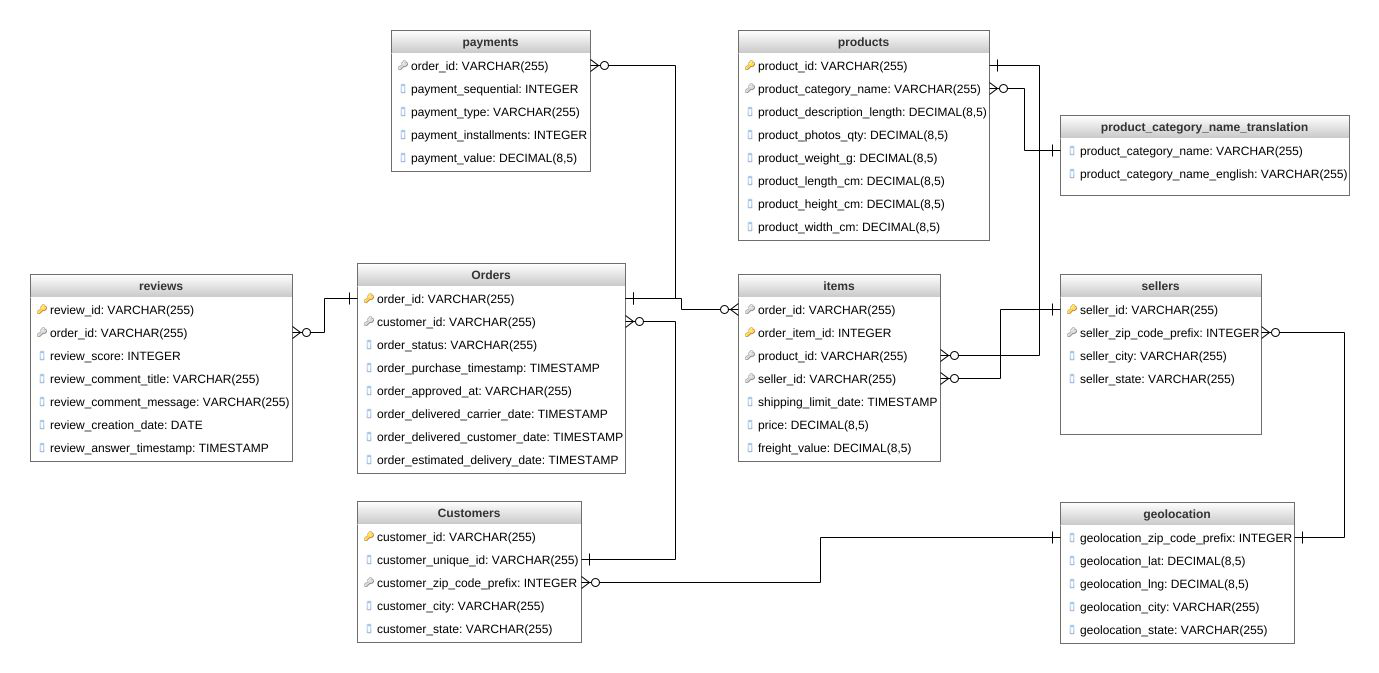

In [11]:
from PIL import Image
img = Image.open('data model.jpeg')
img

As shown in the Data Model, the datasets that used in this project, can be merged. Creating one dataset which includes all the columns would be very efficient in this task.

In [12]:
df = pd.merge(orders,payments, on="order_id")
df = df.merge(customers, on="customer_id")
df = df.merge(items, on="order_id")
df = df.merge(products, on="product_id")
df = df.merge(category_translation, on="product_category_name")
# df = df.merge(sellers, on="seller_id")
# df = df.merge(geolocation[['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng','geolocation_city','geolocation_state']],
#              left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

df.dropna(inplace=True)  #Keep the DataFrame with valid entries in the same variable

df.info()
df.isnull().sum().sort_values()  # To get the number of missing value in each row if there is still any. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113367 entries, 0 to 115877
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113367 non-null  object 
 1   customer_id                    113367 non-null  object 
 2   order_status                   113367 non-null  object 
 3   order_purchase_timestamp       113367 non-null  object 
 4   order_approved_at              113367 non-null  object 
 5   order_delivered_carrier_date   113367 non-null  object 
 6   order_delivered_customer_date  113367 non-null  object 
 7   order_estimated_delivery_date  113367 non-null  object 
 8   payment_sequential             113367 non-null  int64  
 9   payment_type                   113367 non-null  object 
 10  payment_installments           113367 non-null  int64  
 11  payment_value                  113367 non-null  float64
 12  customer_unique_id            

order_id                         0
product_height_cm                0
product_length_cm                0
product_weight_g                 0
product_photos_qty               0
product_description_lenght       0
product_name_lenght              0
product_category_name            0
freight_value                    0
price                            0
shipping_limit_date              0
seller_id                        0
product_id                       0
order_item_id                    0
product_width_cm                 0
customer_state                   0
customer_zip_code_prefix         0
customer_unique_id               0
payment_value                    0
payment_installments             0
payment_type                     0
payment_sequential               0
order_estimated_delivery_date    0
order_delivered_customer_date    0
order_delivered_carrier_date     0
order_approved_at                0
order_purchase_timestamp         0
order_status                     0
customer_id         

In [13]:
df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


### Duplicate check

In [14]:
duplicates = df[df.duplicated()]

duplicates

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english



## Exploratory Data Analysis:
**1. How e_commerce has evolved over time in Brazil?**

**2. Highest Monthly sales over 3 years?**

**3. On what days of week brazilians customers tend to do online shopping?**

**4. Which are top 10 categories?**

**5. What is average price on each product category?**

**6. What is average price of top 10 categories?**

**7. How many payment methods are available? and which one is the most popular?**

**8. Payment methods vs no of installments**

**9. How customers are distributed over the states?**

**10. Which state has longest and shortest delivery time?**

**11. Highest sales for the year 2016, 2017, 2018?**

**12. Which customer city has the highest and lowest shipping Values?**

**13. Product category with the highest number of payment installments?**

***

### **1. How e_commerce has evolved over time in Brazil?**

In [15]:
#'order_purchase_timestamp' and 'order_delivered_customer_date' are object 
df[['order_purchase_timestamp', 'order_delivered_customer_date']]=df[['order_purchase_timestamp', \
                                                                      'order_delivered_customer_date']].apply(pd.to_datetime)

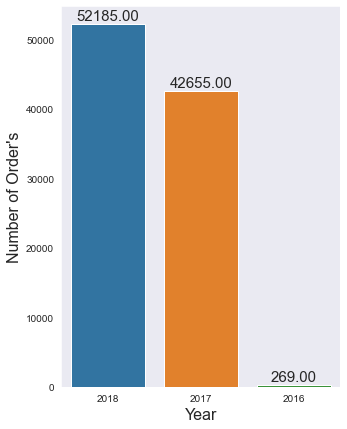

In [16]:

# To extract "year" from date. 
df['Year'] = df['order_purchase_timestamp'].dt.year

df_Order_Year =  df[['order_id','Year']].drop_duplicates(keep='first')

df_Year = df_Order_Year.groupby('Year').size().reset_index(name="count").sort_values(by="count",ascending=False)

df_Year

# plot the analysis
plt.figure(figsize=(5, 7))
sns.set_style("dark")
plots = sns.barplot(x="Year", y="count", data=df_Year,order=df_Year['Year'])
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Year", size=16)
plt.ylabel("Number of Order's",size=16)
plt.show()

**A.: It can be clearly seen from the above bar graph that there was a major change occured in the e-commerce market of Brazil**

In [17]:
# df_Order_Year['order_id'].nunique() -- 95109

### 2. Highest Monthly sales over 3 years?

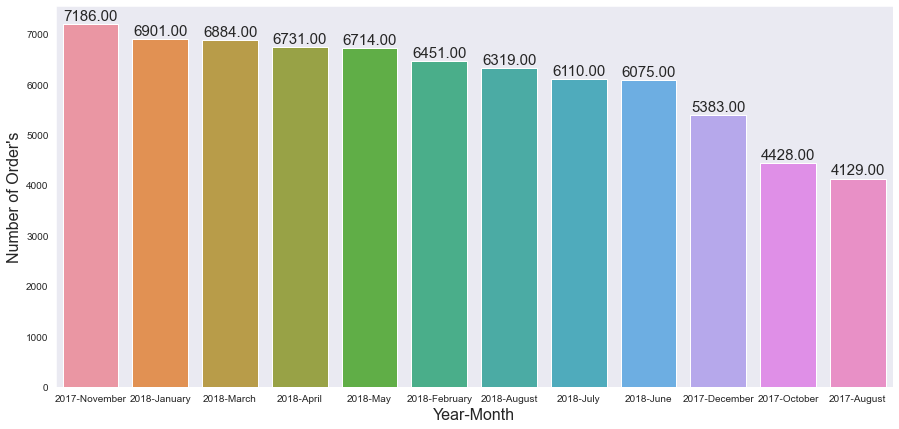

In [18]:
df['Month'] =  df['order_purchase_timestamp'].dt.month_name(locale = 'English')

df['Year-Month']=df['Year'].astype(str)+'-'+df['Month'].astype(str)

df_Order_Month =  df[['order_id','Year-Month']].drop_duplicates(keep='first')

df_Month = df_Order_Month.groupby('Year-Month').size().reset_index(name="count").sort_values(by="count",ascending=False)[:12]

plt.figure(figsize=(15, 7))
sns.set_style("dark")

plots = sns.barplot(x="Year-Month", y="count", data=df_Month,order=df_Month['Year-Month'])
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Year-Month", size=16)
plt.ylabel("Number of Order's",size=16)
plt.show()


**A. : It can be clearly seen that Nov 2017 is the highest sales months over the period of 3 years.**

In [19]:
# df_Month['count'].sum() --95109

----

In [20]:
df['Day'] = df['order_purchase_timestamp'].dt.day_name(locale = 'English')

### **3. On what days of week brazilians customers tend to do online shopping?**

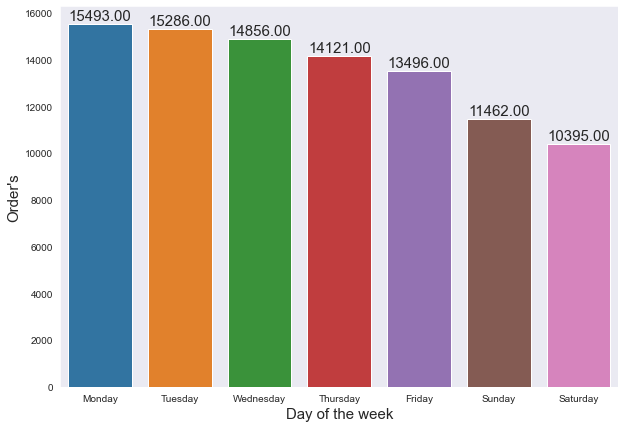

In [21]:
df_Order_Day =  df[['order_id','Day']].drop_duplicates(keep='first')

df_Day = df_Order_Day.groupby('Day').size().reset_index(name="count").sort_values(by="count",ascending=False)
sns.set_style("dark")

plt.figure(figsize=(10, 7))
plots = sns.barplot(x="Day", y="count", data=df_Day, order=df_Day['Day'])
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Day of the week", size=15)
plt.ylabel("Order's",size=15)
plt.show()


**A.: We can see more online shopping happen on weekdays and less on weekends.**

In [22]:
# df_Day['count'].sum() -- 95109

In [23]:
# df[df['order_id']=='687b6310118e5776dd599634c9dc51fc'][['order_id','order_purchase_timestamp','Month','Day','Year']]

***

In [24]:
df_prods_order = df[['product_category_name_english','order_id']].drop_duplicates(keep='first')

### **4. Which are top 10 categories?**

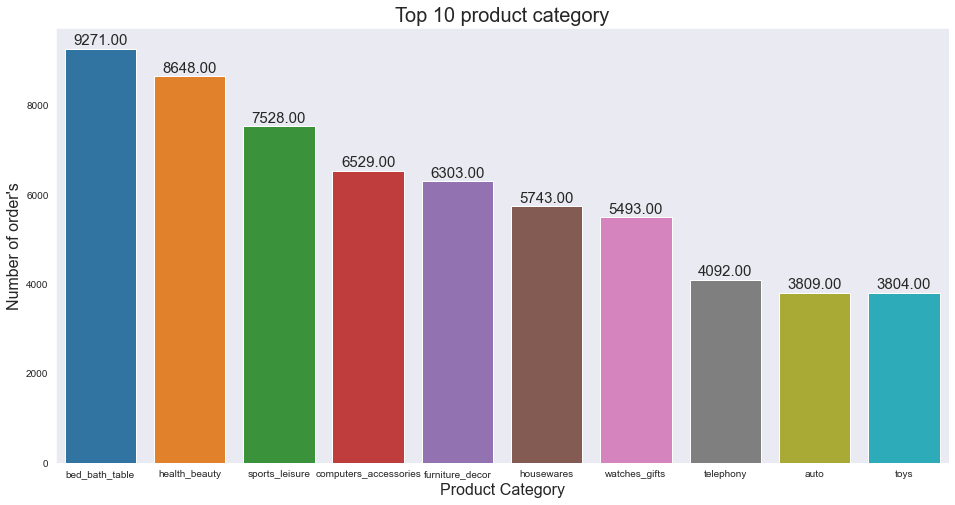

In [25]:
top_10_category = df_prods_order["product_category_name_english"].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(16,8))
sns.set_style("dark")
plots=sns.barplot(x=top_10_category.index, y=top_10_category.values)
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Product Category",fontsize=16)
plt.ylabel("Number of order's",fontsize=16)
plt.title('Top 10 product category',fontsize=20)
plt.show()

### **A.: Bed_bath_table category is the top selling category.**

----

In [26]:
df_prods_order_price = df[['product_category_name_english','order_id','price']].drop_duplicates(keep='first')

### **5. What is average price on each product category?**

In [27]:
average_price = df_prods_order_price.groupby("product_category_name_english")["price"].agg(np.mean).reset_index(name="average").sort_values(by="average",ascending=False)
average_price.head()

,product_category_name_english,average
14,computers,1143.080169
64,small_appliances_home_oven_and_coffee,638.213151
45,home_appliances_2,474.538194
0,agro_industry_and_commerce,352.406236
56,musical_instruments,290.826537


**A.: Average price per category is highest for computers.**

----

### **6. What is average price of top 10 categories?**

In [28]:
top_category = average_price[average_price['product_category_name_english'].isin(top_10_category.index)]

top_category

,product_category_name_english,average
70,watches_gifts,203.721581
5,auto,141.260301
43,health_beauty,135.061641
69,toys,119.167323
65,sports_leisure,117.273794
15,computers_accessories,116.765387
7,bed_bath_table,95.969729
49,housewares,95.229738
39,furniture_decor,94.045859
68,telephony,70.072407


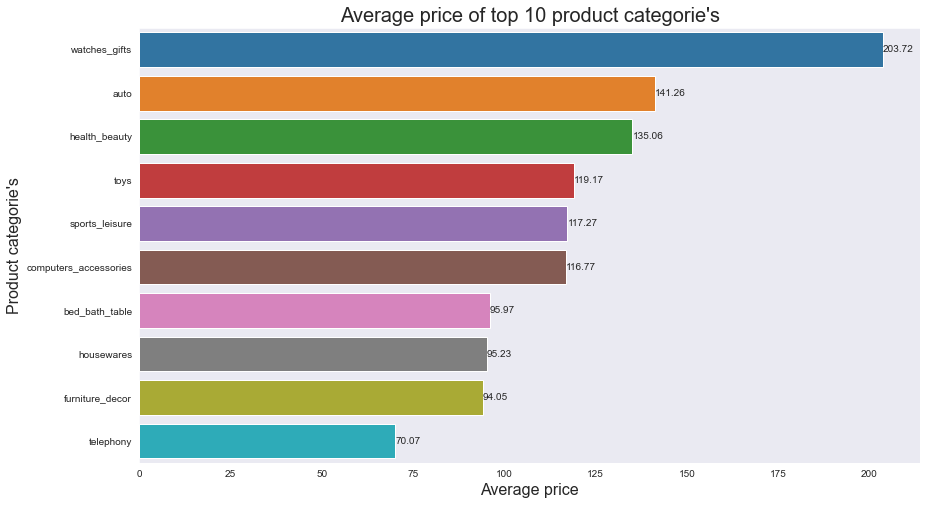

In [29]:
fig=plt.figure(figsize=(14,8))
sns.set_style("dark")
sns.barplot(y=top_category.product_category_name_english, x=top_category.average)

for y, x in enumerate(round(top_category.average,2)):
    plt.annotate(str(x), xy=(x, y),ha='left', va='center')

plt.xlabel("Average price",fontsize=16)
plt.ylabel("Product categorie's",fontsize=16)
plt.title("Average price of top 10 product categorie's",fontsize=20)
plt.show()

**A. : Watches and gifts is the top product with highest average price**

----

### **7. How many payment methods are available? and which one is the most popular?**

In [30]:
df.payment_type.head()

0    credit_card
1        voucher
2        voucher
3    credit_card
4    credit_card
Name: payment_type, dtype: object

In [31]:
df.payment_type.nunique()

4

In [32]:
df.payment_type.unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

In [33]:
df_pay_order = df[['payment_type','order_id','payment_installments']].drop_duplicates(keep='first')

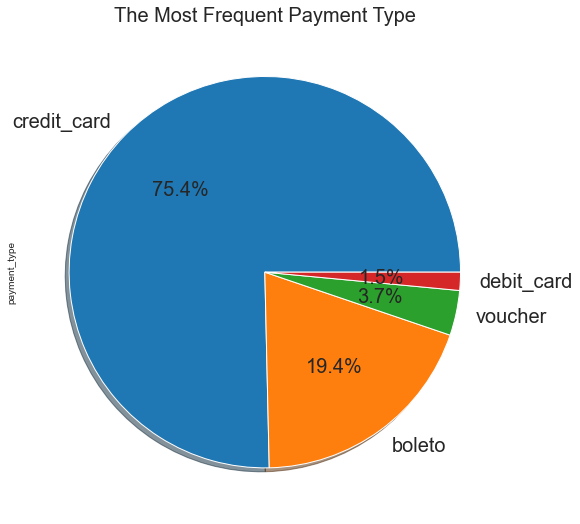

In [34]:
df_pay_order["payment_type"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    fontsize=20,
    figsize=(9,9),
    shadow=True
    
)
plt.title('The Most Frequent Payment Type'.title() , fontsize=20)
plt.show()

**A. There are 4 payment types in Brazil with Credit Card solely account of 75 % and it is the most common payment method.**


-----

### **8. Payment methods vs no of installments**

In [63]:
Top_payment_installments = df_pay_order.groupby('payment_type')['payment_installments'].agg(np.max).reset_index(name="total").sort_values(by="total",ascending=False)

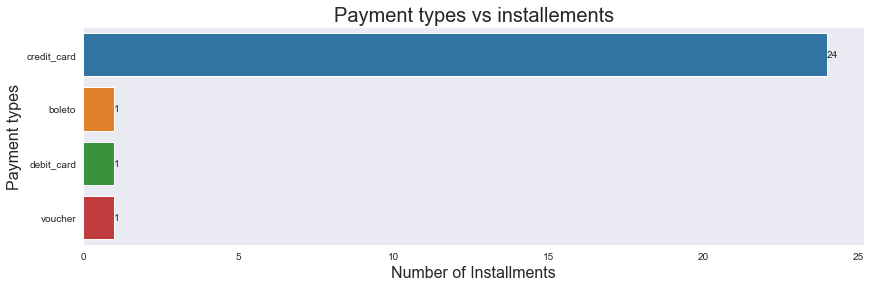

In [64]:
fig=plt.figure(figsize=(14,4))
sns.set_style("dark")
sns.barplot(y=Top_payment_installments.payment_type, x=Top_payment_installments.total)

for y, x in enumerate(Top_payment_installments.total):
    plt.annotate(str(x), xy=(x, y),ha='left', va='center')

plt.xlabel("Number of Installments",fontsize=16)
plt.ylabel("Payment types",fontsize=16)
plt.title("Payment types vs installements",fontsize=20)
plt.show()

----

### **9. How customers are distributed over the states?**

In [37]:
df_customer_state = df[['customer_state','order_id']].drop_duplicates(keep='first')

In [38]:
top_states = df_customer_state["customer_state"].value_counts()
top_states[:5]

SP    39942
RJ    12167
MG    11185
RS     5264
PR     4855
Name: customer_state, dtype: int64

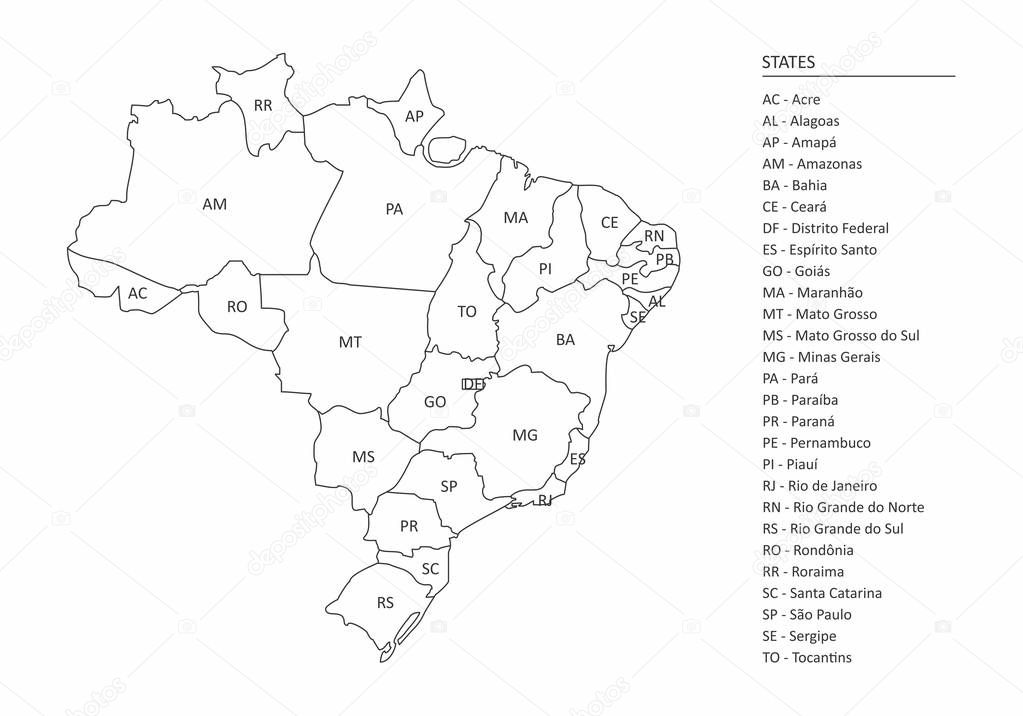

In [39]:
from PIL import Image
img = Image.open('Brazil States.jpg')
img

**A. : Most customers are from Sao Paulo, followed by Rio de Janeiro.**

----

### **10 . Which state has longest & shortest average delivery time?**

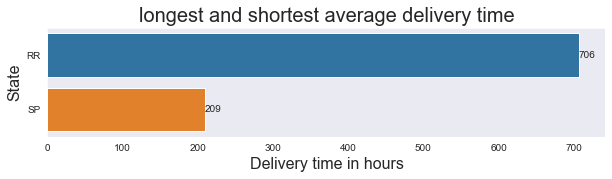

In [42]:
df['delivery_time'] = (df['order_delivered_customer_date']- df['order_purchase_timestamp']).astype('timedelta64[h]')

df_order_del = df[['delivery_time','order_id','customer_state']].drop_duplicates(keep='first')

delivery_per_state = df_order_del.groupby("customer_state")['delivery_time'].mean().reset_index(name="average").sort_values(by="average",ascending=False)

high_long_del  = delivery_per_state.iloc[[0,len(delivery_per_state)-1]]

fig=plt.figure(figsize=(10,2))
sns.set_style("dark")
sns.barplot(y=high_long_del.customer_state, x=high_long_del.average)

for y, x in enumerate(high_long_del.average.astype(int)):
    plt.annotate(str(x), xy=(x, y),ha='left', va='center')

plt.xlabel("Delivery time in hours",fontsize=16)
plt.ylabel("State",fontsize=16)
plt.title("longest and shortest average delivery time",fontsize=20)
plt.show()

**A.: The longest and shortest delivery time belongs to the State of Roraima(RR) and Sao Paulo(SP).**

### 11. Highest sales for the year 2016, 2017, 2018

In [43]:
df_sales = df[['order_id','Year','payment_value']]
df_sales = df_sales.drop_duplicates()

In [44]:
df_year_sales = df_sales.groupby(['order_id','Year'])['payment_value'].agg(np.sum).reset_index(name="sales").sort_values(by="sales",ascending=False)

In [45]:
df_year_sales["rank"] = df_year_sales[['Year','sales']].groupby("Year")["sales"].rank("dense", ascending=False)

In [46]:
df_year_sales = df_year_sales[df_year_sales["rank"]==1]

In [47]:
df_year_sales

,order_id,Year,sales,rank
1410,03caa2c082116e1d31e67e9ae3700499,2017,13664.08,1.0
42867,736e1922ae60d0d6a89247b851902527,2018,7274.88,1.0
69879,bc0e0c28cbe995798d3afb7c7c75d269,2016,1423.55,1.0


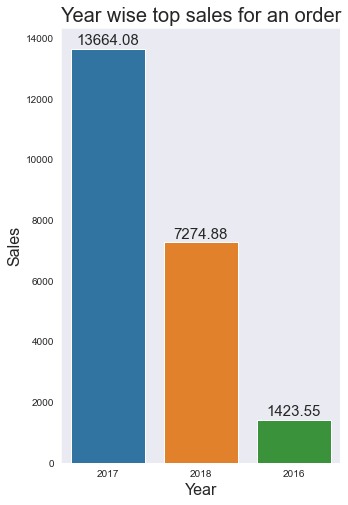

In [48]:
plt.figure(figsize=(5, 8))
sns.set_style("dark")

plots = sns.barplot(x="Year", y="sales", data=df_year_sales,order=df_year_sales['Year'])

for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Year",fontsize=16)
plt.ylabel("Sales",fontsize=16)
plt.title('Year wise top sales for an order',fontsize=20)
plt.show()


**A.: 2017 year has the highest sales with almost double the amount compared to 2018 **

-------------

### 12. Customer City vs Freight Value

In [49]:
df_city_price = df[['customer_city','freight_value','price','product_category_name_english']]

In [50]:
df_city_price = df_city_price.drop_duplicates(keep='first')

In [51]:
df_city_price.price.value_counts().head()

59.9    1658
69.9    1516
49.9    1389
89.9    1190
99.9    1102
Name: price, dtype: int64

In [52]:
df_city_price[df_city_price.price==59.9]['product_category_name_english'].value_counts().head()

garden_tools       274
furniture_decor    198
sports_leisure     190
housewares         152
bed_bath_table     137
Name: product_category_name_english, dtype: int64

In [53]:
df_city_freight = df_city_price[(df_city_price.price==59.9) & (df_city_price.product_category_name_english == 'garden_tools')].sort_values(by='freight_value',ascending=False)

In [54]:
df_city_freight = df_city_freight.iloc[[0,1,len('customer_city')-2,len('customer_city')-1]]

In [55]:
df_city_freight

,customer_city,freight_value,price,product_category_name_english
33236,vitoria,65.23,59.9,garden_tools
33126,salinas,65.23,59.9,garden_tools
31533,aracaju,37.97,59.9,garden_tools
33155,santo andre,35.93,59.9,garden_tools


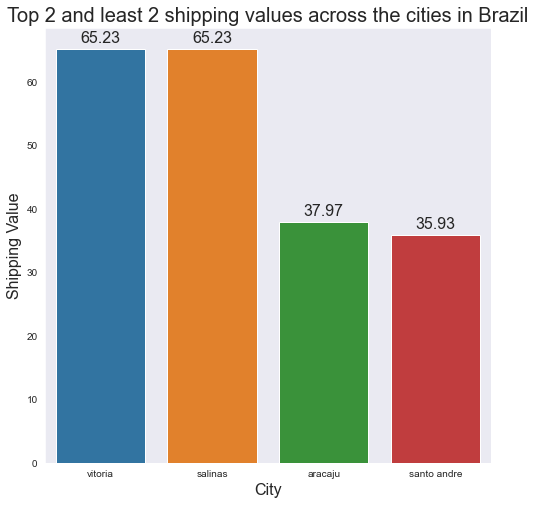

In [56]:
plt.figure(figsize=(8, 8))
sns.set_style("dark")

plots = sns.barplot(x="customer_city", y="freight_value", data=df_city_freight,order=df_city_freight['customer_city'])

for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=16, xytext=(0, 10),
                   textcoords='offset points')
plt.xlabel("City",fontsize=16)
plt.ylabel("Shipping Value",fontsize=16)
plt.title('Top 2 and least 2 shipping values across the cities in Brazil',fontsize=20)
plt.show()


**A.: vitoria and salinas has the higesht shipping value and santo andre has the lowest shipping value **

-----------

### 13. Product category with the highest number of payment installments

In [57]:
df_p_i = df[['product_category_name_english','order_id','payment_installments']].drop_duplicates(keep='first')

In [58]:
Top_product_installments = df_p_i.groupby('product_category_name_english')['payment_installments'].agg(np.sum).reset_index(name="total").sort_values(by="total",ascending=False)[:5]

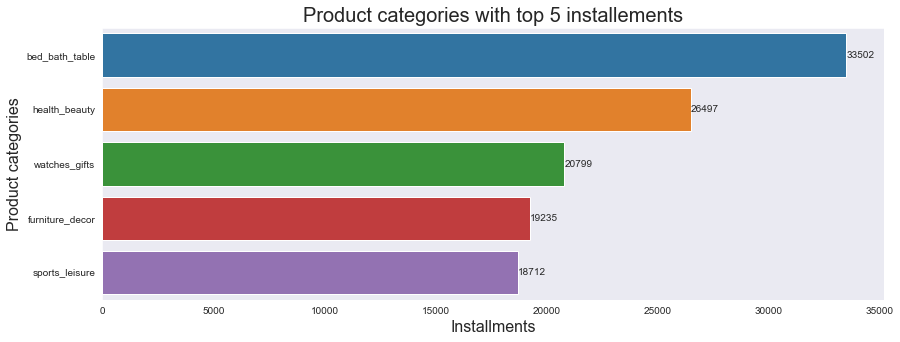

In [59]:
fig=plt.figure(figsize=(14,5))
sns.set_style("dark")
sns.barplot(y=Top_product_installments.product_category_name_english, x=Top_product_installments.total)

for y, x in enumerate(Top_product_installments.total):
    plt.annotate(str(x), xy=(x, y),ha='left', va='center')

plt.xlabel("Installments",fontsize=16)
plt.ylabel("Product categories",fontsize=16)
plt.title("Product categories with top 5 installements",fontsize=20)
plt.show()

**A.: Bed bath table has the higesht number of payment installments **

--------------